Trabalho Fase 4 Cap 3

Grupo:

Bruno Castro - RM558359

Hugo Mariano - RM560688

Matheus Castro - RM559293

## Carregando a Base

In [ ]:

import pandas as pd


file_path = r"C:\Users\gugue\OneDrive\Área de Trabalho\Fiap\Fase 4\seeds_dataset.txt"

column_names = [
    "Area", "Perimeter", "Compactness", "KernelLength", 
    "KernelWidth", "AsymmetryCoefficient", "GrooveLength", "Class"
]


seeds_data = pd.read_csv(file_path, sep="\t", header=None, names=column_names)


seeds_data["Class"] = seeds_data["Class"].replace({1: "Kama", 2: "Rosa", 3: "Canadian"})


seeds_data.head()


print(seeds_data.head())


print(seeds_data.info())

    Area  Perimeter  Compactness  KernelLength  KernelWidth  \
0  15.26      14.84       0.8710         5.763        3.312   
1  14.88      14.57       0.8811         5.554        3.333   
2  14.29      14.09       0.9050         5.291        3.337   
3  13.84      13.94       0.8955         5.324        3.379   
4  16.14      14.99       0.9034         5.658        3.562   

   AsymmetryCoefficient  GrooveLength Class  
0                 2.221         5.220  Kama  
1                 1.018         4.956  Kama  
2                 2.699         4.825  Kama  
3                 2.259         4.805  Kama  
4                 1.355         5.175  Kama  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area                  210 non-null    float64
 1   Perimeter             210 non-null    float64
 2   Compactness           210 non-nu

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")

# Análise Inicial do Conjunto de Dados

## Resumo das Estatísticas Descritivas
A análise estatística revelou diferenças importantes entre as classes:
- **Rosa**: Apresenta os maiores valores médios para a maioria das características, como área, perímetro, comprimento do núcleo e comprimento do sulco. Essa classe também apresenta maior variabilidade, indicando grãos maiores e mais heterogêneos.
- **Kama**: Possui valores intermediários para a maioria das características, com menor dispersão em algumas variáveis, sugerindo grãos consistentes e de tamanho médio.
- **Canadian**: Apresenta os menores valores médios, como área e perímetro, além da menor variabilidade, indicando grãos menores e mais uniformes. Essa classe se destaca por sua compacidade menor.

## Resumo dos Histogramas
Os histogramas destacam padrões importantes:
- **Área**, **Perímetro** e **Comprimento do Núcleo** mostram boa separação entre as classes, com **Rosa** se destacando nos maiores valores, **Kama** intermediária e **Canadian** com os menores valores.
- **Compactness** e **Coeficiente de Assimetria** apresentam maior sobreposição entre as classes, tornando-se menos úteis isoladamente para discriminação.
- **Largura do Núcleo** e **Comprimento do Sulco** também mostram separação moderada, sendo **Rosa** a classe com os maiores valores.

## Resumo da Matriz de Correlação
A matriz de correlação revelou:
- Forte inter-relação entre **Área**, **Perímetro**, **Comprimento do Núcleo** e **Largura do Núcleo**, sugerindo que essas dimensões gerais do grão são bons indicadores para separação das classes.
- **Compactness** e **Coeficiente de Assimetria** apresentam correlação fraca ou negativa com outras variáveis, indicando que podem adicionar informações complementares úteis para a classificação.
- **Comprimento do Sulco** tem correlação positiva com as dimensões gerais, reforçando sua relevância como característica discriminante.

## Resumo dos Boxplots
Os boxplots reforçam os padrões observados:
- **Rosa** possui as medianas mais altas para características como **Área**, **Perímetro**, **Comprimento do Núcleo** e **Largura do Núcleo**, mostrando que os grãos dessa classe tendem a ser maiores e mais variáveis.
- **Kama** apresenta valores intermediários, com menor dispersão em algumas características, indicando consistência moderada.
- **Canadian** tem as menores medianas e dispersões na maioria das características, indicando grãos pequenos e uniformes.
- Outliers são visíveis em variáveis como **Coeficiente de Assimetria** (nas classes **Rosa** e **Canadian**) e **Comprimento do Sulco** (na classe **Kama**), e devem ser analisados para decidir se são representativos ou erros.
- Características como **Área**, **Perímetro** e **Comprimento do Núcleo** mostram boa separação entre as classes, enquanto **Compactness** apresenta maior sobreposição.

---

### Conclusão Geral
Os dados mostram padrões claros entre as classes, especialmente em características relacionadas ao tamanho e forma dos grãos. **Rosa** é a classe mais distinta por seus valores mais altos, enquanto **Canadian** é a mais uniforme e menor em dimensões. As análises iniciais indicam que variáveis como **Área**, **Perímetro**, **Comprimento do Núcleo** e **Largura do Núcleo** serão fundamentais para a construção de um modelo de classificação, enquanto **Compactness** e **Coeficiente de Assimetria** podem trazer informações complementares. Os outliers identificados devem ser analisados para garantir a qualidade dos dados antes do treinamento do modelo.



In [ ]:

descriptive_stats = seeds_data.groupby("Class").agg(
    {
        "Area": ['mean', 'median', 'std'],
        "Perimeter": ['mean', 'median', 'std'],
        "Compactness": ['mean', 'median', 'std'],
        "KernelLength": ['mean', 'median', 'std'],
        "KernelWidth": ['mean', 'median', 'std'],
        "AsymmetryCoefficient": ['mean', 'median', 'std'],
        "GrooveLength": ['mean', 'median', 'std']
    }
)


descriptive_stats

Area                    Perimeter                  Compactness  \
               mean  median       std       mean median       std        mean   
Class                                                                           
Canadian  11.873857  11.835  0.723004  13.247857  13.25  0.340196    0.849409   
Kama      14.334429  14.355  1.215704  14.294286  14.32  0.576583    0.880070   
Rosa      18.334286  18.720  1.439496  16.135714  16.21  0.616995    0.883517   

                            KernelLength  ...           KernelWidth          \
           median       std         mean  ...       std        mean  median   
Class                                     ...                                 
Canadian  0.84935  0.021760     5.229514  ...  0.138015    2.853771  2.8345   
Kama      0.88050  0.016191     5.508057  ...  0.231508    3.244629  3.2435   
Rosa      0.88260  0.015500     6.148029  ...  0.268191    3.677414  3.6935   

                   AsymmetryCoefficient                   GrooveLength  \
               std                 mean  median       std         mean   
Class                                                                    
Canadian  0.147516             4.788400  4.8390  1.336465     5.116400   
Kama      0.177616             2.667403  2.5455  1.173901     5.087214   
Rosa      0.185539             3.644800  3.6095  1.181868     6.020600   

                            
          median       std  
Class                       
Canadian  5.0915  0.162068  
Kama      5.0940  0.263699  
Rosa      5.9815  0.253934  

[3 rows x 21 columns]

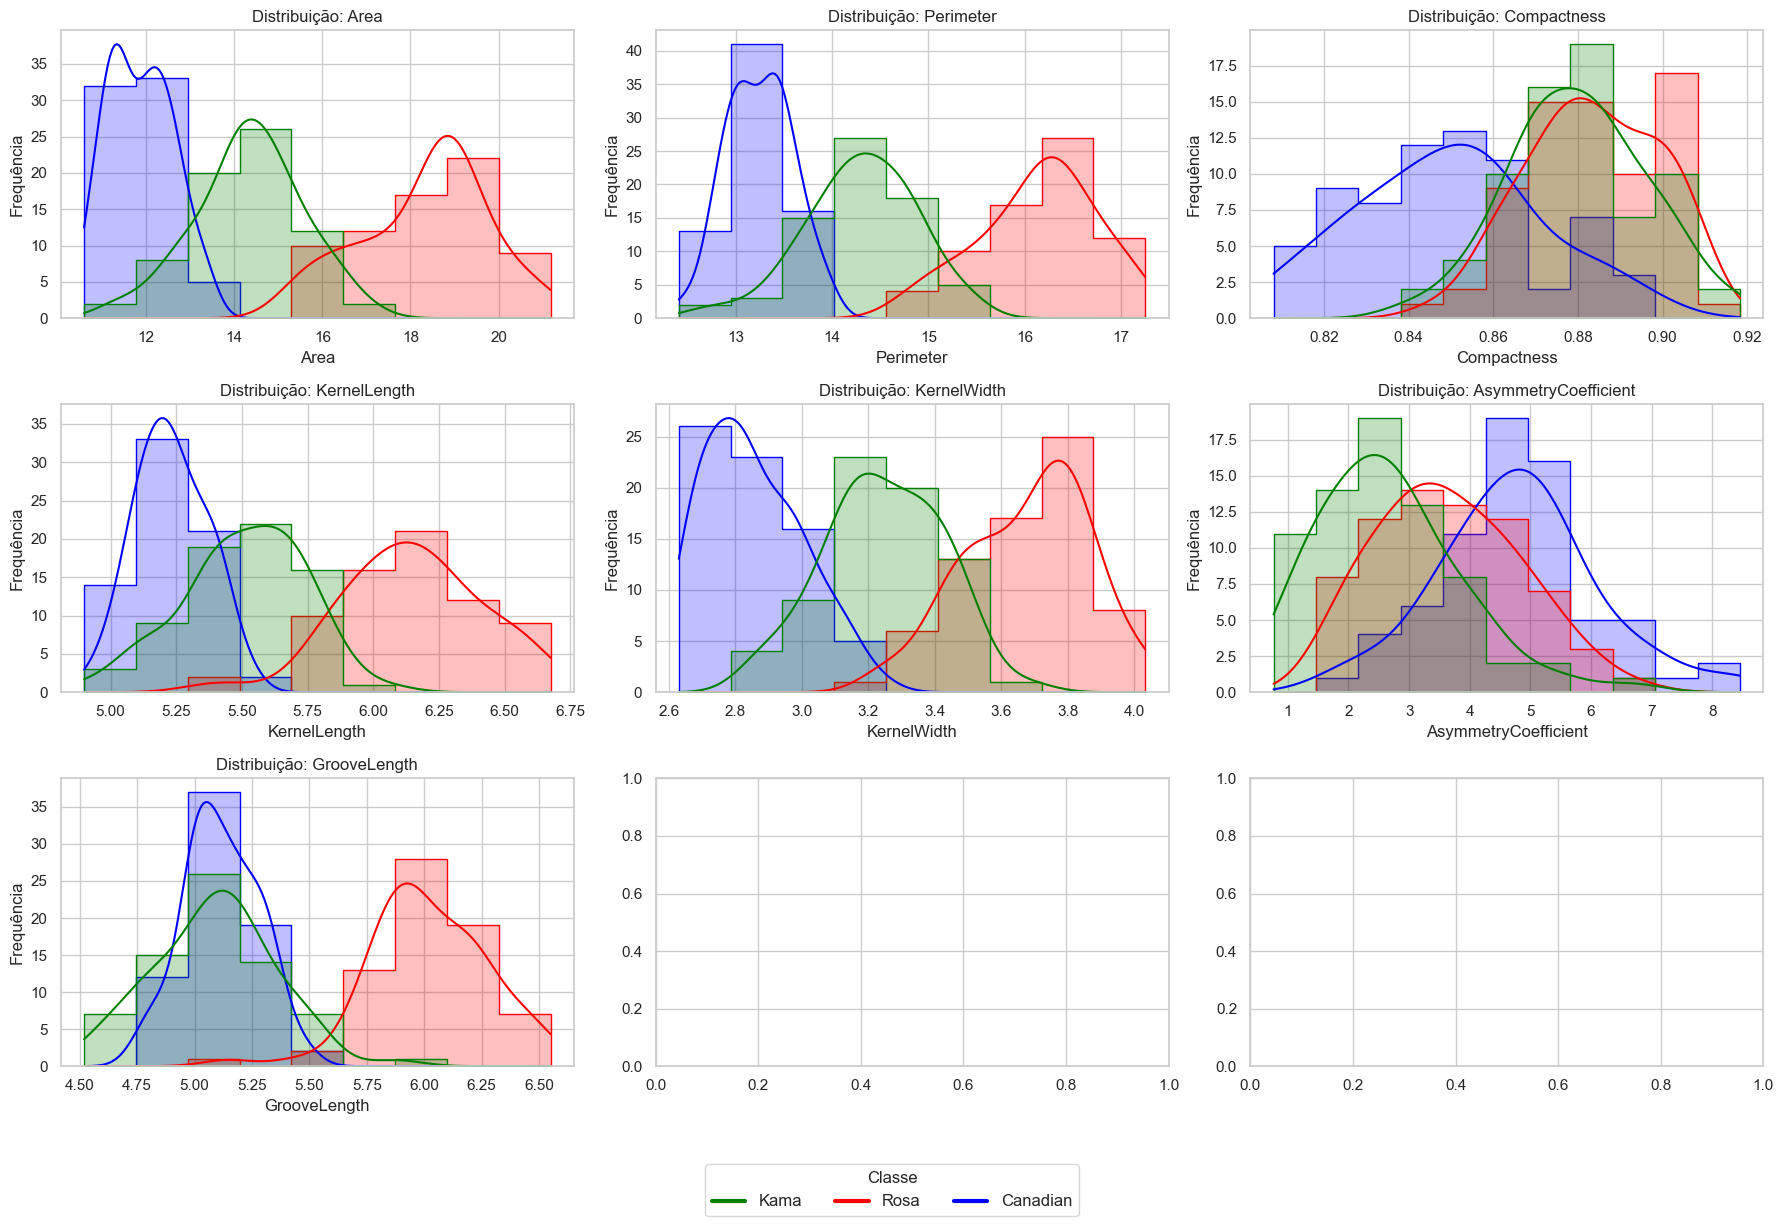

In [ ]:

features = ["Area", "Perimeter", "Compactness", "KernelLength", 
            "KernelWidth", "AsymmetryCoefficient", "GrooveLength"]


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))  
axes = axes.flatten() 

palette = {"Kama": "green", "Rosa": "red", "Canadian": "blue"}
class_labels = ["Kama", "Rosa", "Canadian"]


for i, feature in enumerate(features):
    sns.histplot(
        data=seeds_data,
        x=feature,
        hue="Class",
        kde=True,
        element="step",
        palette=palette,
        ax=axes[i]  
    )
    axes[i].set_title(f"Distribuição: {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequência")
    axes[i].get_legend().remove()  


fig.legend(
    labels=class_labels,
    loc="lower center",
    ncol=3,
    title="Classe",
    frameon=True,
    fancybox=True,
    bbox_to_anchor=(0.5, -0.02),  
    borderaxespad=0,
    markerscale=2,
    fontsize=12,
    handles=[
        plt.Line2D([0], [0], color="green", lw=3, label="Kama"),
        plt.Line2D([0], [0], color="red", lw=3, label="Rosa"),
        plt.Line2D([0], [0], color="blue", lw=3, label="Canadian"),
    ],
)


plt.tight_layout(rect=[0, 0.05, 1, 1])  
plt.show()


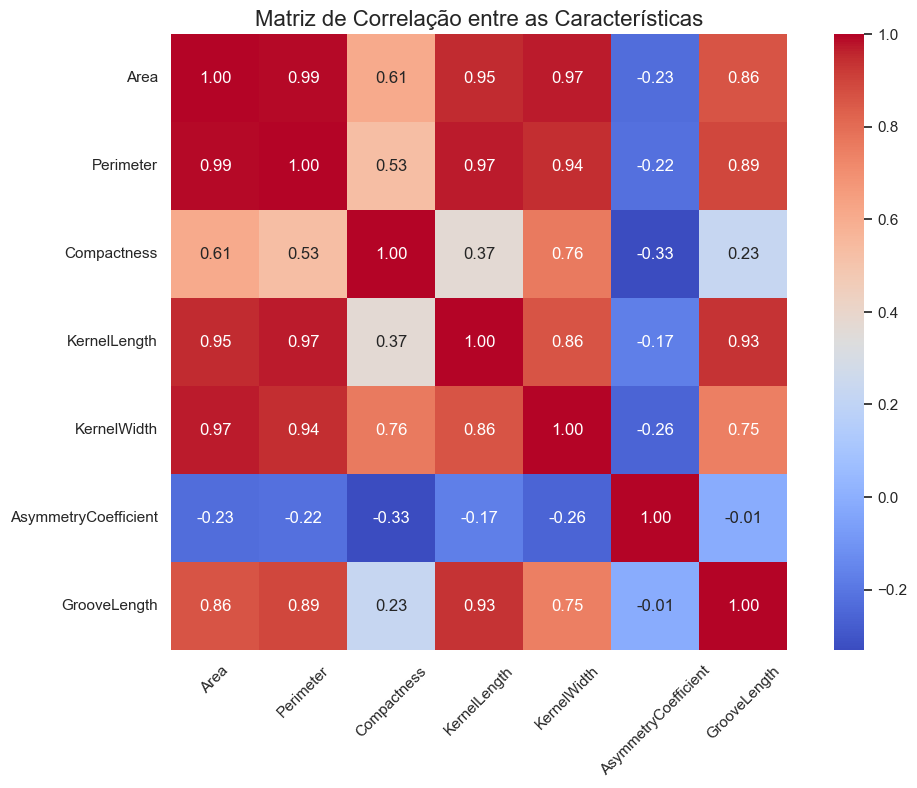

In [ ]:

correlation_matrix = seeds_data.drop("Class", axis=1).corr()


plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True,  
    fmt=".2f",   
    cmap="coolwarm",  
    cbar=True,  
    square=True  
)


plt.title("Matriz de Correlação entre as Características", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

C:\Users\gugue\AppData\Local\Temp\ipykernel_15188\665852521.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\gugue\AppData\Local\Temp\ipykernel_15188\665852521.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\gugue\AppData\Local\Temp\ipykernel_15188\665852521.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\gugue\AppData\Local\Temp\ipykernel_15188\665852521.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

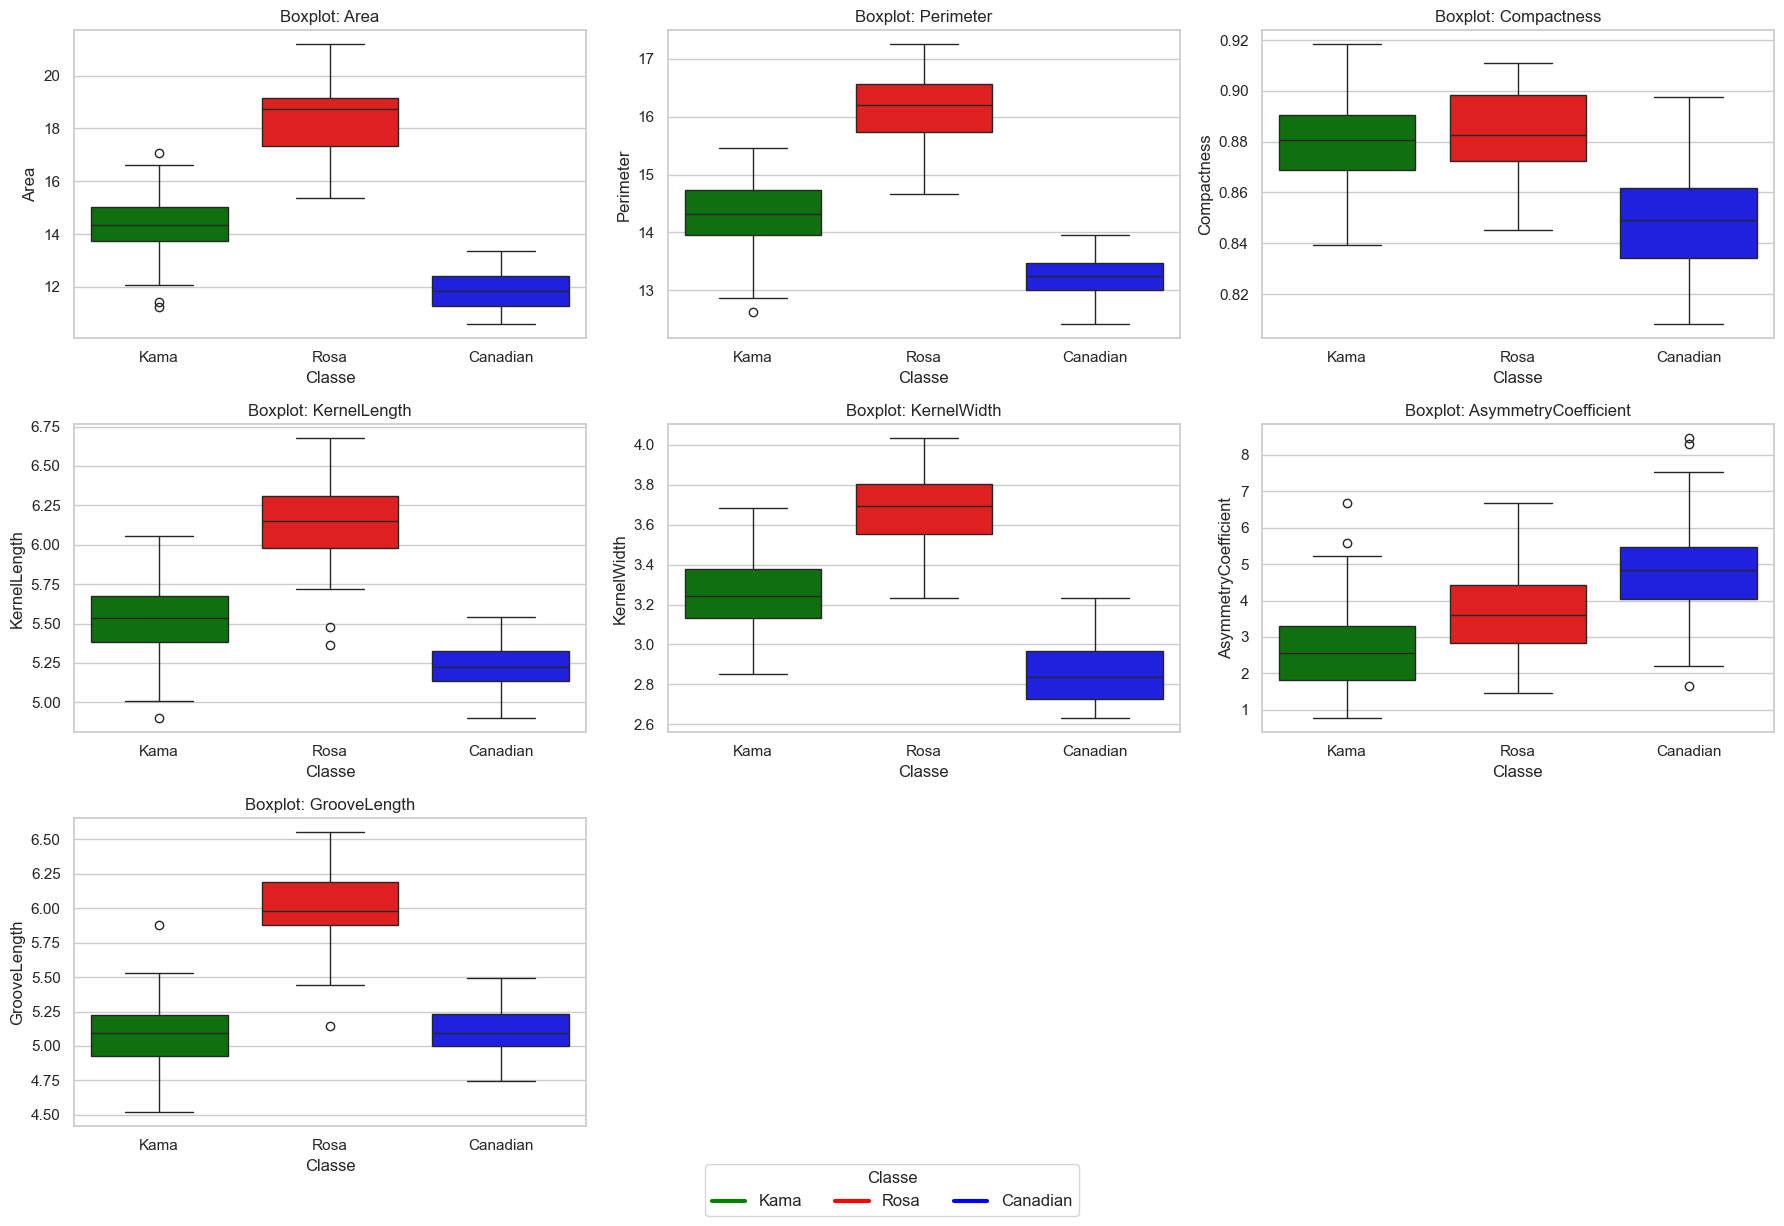

In [ ]:

palette = {"Kama": "green", "Rosa": "red", "Canadian": "blue"}
features = ["Area", "Perimeter", "Compactness", "KernelLength", 
            "KernelWidth", "AsymmetryCoefficient", "GrooveLength"]


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()


for i, feature in enumerate(features):
    sns.boxplot(
        data=seeds_data,
        x="Class",
        y=feature,
        palette=palette,
        ax=axes[i]  
    )
    axes[i].set_title(f"Boxplot: {feature}")
    axes[i].set_xlabel("Classe")
    axes[i].set_ylabel(feature)


for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

fig.legend(
    labels=class_labels,
    loc="lower center",
    ncol=3,
    title="Classe",
    frameon=True,
    fancybox=True,
    bbox_to_anchor=(0.5, -0.02),  
    borderaxespad=0,
    markerscale=2,
    fontsize=12,
    handles=[
        plt.Line2D([0], [0], color="green", lw=3, label="Kama"),
        plt.Line2D([0], [0], color="red", lw=3, label="Rosa"),
        plt.Line2D([0], [0], color="blue", lw=3, label="Canadian"),
    ],
)


plt.tight_layout()
plt.show()


# Implementação de Modelos de Classificação e Avaliação dos Resultados

## **Análise dos Modelos**
Foram avaliados três modelos principais: **K-Nearest Neighbors (KNN)**, **Support Vector Machine (SVM)** e **Random Forest**. Os resultados mostram que **KNN e SVM** tiveram desempenhos muito semelhantes e superiores em relação ao Random Forest. Ambos conseguiram uma classificação robusta, especialmente para as classes mais bem separadas.

A **Random Forest**, apesar de ser resistente a outliers e não sensível à escala, apresentou desempenho levemente inferior. Isso pode estar relacionado à falta de ajuste fino dos hiperparâmetros e à maior confusão observada em classes com características sobrepostas, como a classe "Rosa".

## **Pontos Observados**
1. **KNN e SVM**:
   - Ambos os modelos mostraram capacidade sólida de separar as classes, com métricas de desempenho bastante próximas.
   - A padronização dos dados foi essencial para o sucesso desses modelos, já que eles dependem de cálculos baseados em distância.

2. **Random Forest**:
   - Apesar de robusta, teve maior dificuldade na separação da classe "Rosa", apresentando mais erros quando comparada aos outros dois modelos.

3. **Classe "Rosa"**:
   - Todos os modelos apresentaram dificuldades com a classe "Rosa", que foi frequentemente confundida com a classe "Kama". Isso reflete a sobreposição observada nas análises exploratórias iniciais (histogramas e correlação).

## **Conclusão**
- **KNN e SVM** foram os modelos mais eficazes, destacando-se como as melhores opções para este problema.
- A **Random Forest** continua sendo uma alternativa robusta e interpretável, mas com desempenho inferior nesta configuração.


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


X = seeds_data.drop("Class", axis=1)  
y = seeds_data["Class"]  #


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)  


print("Dados de treino:", X_train_scaled.shape)
print("Dados de teste:", X_test_scaled.shape)
print("Classes:", label_encoder.classes_)

Dados de treino: (147, 7)
Dados de teste: (63, 7)
Classes: ['Canadian' 'Kama' 'Rosa']


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


y_pred_knn = knn.predict(X_test_scaled)


knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average="weighted")
knn_recall = recall_score(y_test, y_pred_knn, average="weighted")
knn_f1 = f1_score(y_test, y_pred_knn, average="weighted")
knn_confusion = confusion_matrix(y_test, y_pred_knn)


print("Desempenho do K-Nearest Neighbors (KNN):")
print(f"Acurácia: {knn_accuracy:.4f}")
print(f"Precisão: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1-Score: {knn_f1:.4f}")
print("Matriz de Confusão:")
print(knn_confusion)


Desempenho do K-Nearest Neighbors (KNN):
Acurácia: 0.8889
Precisão: 0.8887
Recall: 0.8889
F1-Score: 0.8885
Matriz de Confusão:
[[19  2  0]
 [ 3 17  1]
 [ 0  1 20]]


In [ ]:
from sklearn.svm import SVC


svm = SVC(kernel="linear", random_state=42)
svm.fit(X_train_scaled, y_train)


y_pred_svm = svm.predict(X_test_scaled)


svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average="weighted")
svm_recall = recall_score(y_test, y_pred_svm, average="weighted")
svm_f1 = f1_score(y_test, y_pred_svm, average="weighted")
svm_confusion = confusion_matrix(y_test, y_pred_svm)


print("Desempenho do Support Vector Machine (SVM):")
print(f"Acurácia: {svm_accuracy:.4f}")
print(f"Precisão: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1-Score: {svm_f1:.4f}")
print("Matriz de Confusão:")
print(svm_confusion)


Desempenho do Support Vector Machine (SVM):
Acurácia: 0.8889
Precisão: 0.8887
Recall: 0.8889
F1-Score: 0.8885
Matriz de Confusão:
[[19  2  0]
 [ 3 17  1]
 [ 0  1 20]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  


y_pred_rf = rf.predict(X_test)


rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average="weighted")
rf_recall = recall_score(y_test, y_pred_rf, average="weighted")
rf_f1 = f1_score(y_test, y_pred_rf, average="weighted")
rf_confusion = confusion_matrix(y_test, y_pred_rf)


print("Desempenho do Random Forest (sem padronização):")
print(f"Acurácia: {rf_accuracy:.4f}")
print(f"Precisão: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print("Matriz de Confusão:")
print(rf_confusion)


Desempenho do Random Forest (sem padronização):
Acurácia: 0.8413
Precisão: 0.8415
Recall: 0.8413
F1-Score: 0.8402
Matriz de Confusão:
[[18  3  0]
 [ 5 15  1]
 [ 0  1 20]]


               Acurácia  Precisão    Recall  F1-Score
Modelo                                               
KNN            0.888889  0.888672  0.888889  0.888457
SVM            0.888889  0.888672  0.888889  0.888457
Random Forest  0.841270  0.841488  0.841270  0.840188


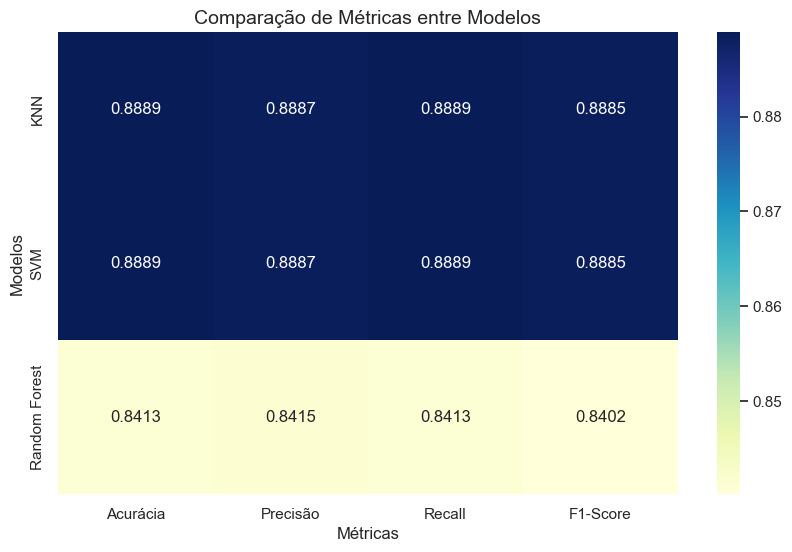

In [ ]:
import seaborn as sns


comparison_df = pd.DataFrame({
    "Modelo": ["KNN", "SVM", "Random Forest"],
    "Acurácia": [knn_accuracy, svm_accuracy, rf_accuracy],
    "Precisão": [knn_precision, svm_precision, rf_precision],
    "Recall": [knn_recall, svm_recall, rf_recall],
    "F1-Score": [knn_f1, svm_f1, rf_f1]
}).set_index("Modelo")

print(comparison_df)

plt.figure(figsize=(10, 6))
sns.heatmap(
    comparison_df,
    annot=True,  
    fmt=".4f",  
    cmap="YlGnBu",  
    cbar=True  
)

# Título e rótulos
plt.title("Comparação de Métricas entre Modelos", fontsize=14)
plt.xlabel("Métricas", fontsize=12)
plt.ylabel("Modelos", fontsize=12)
plt.show()

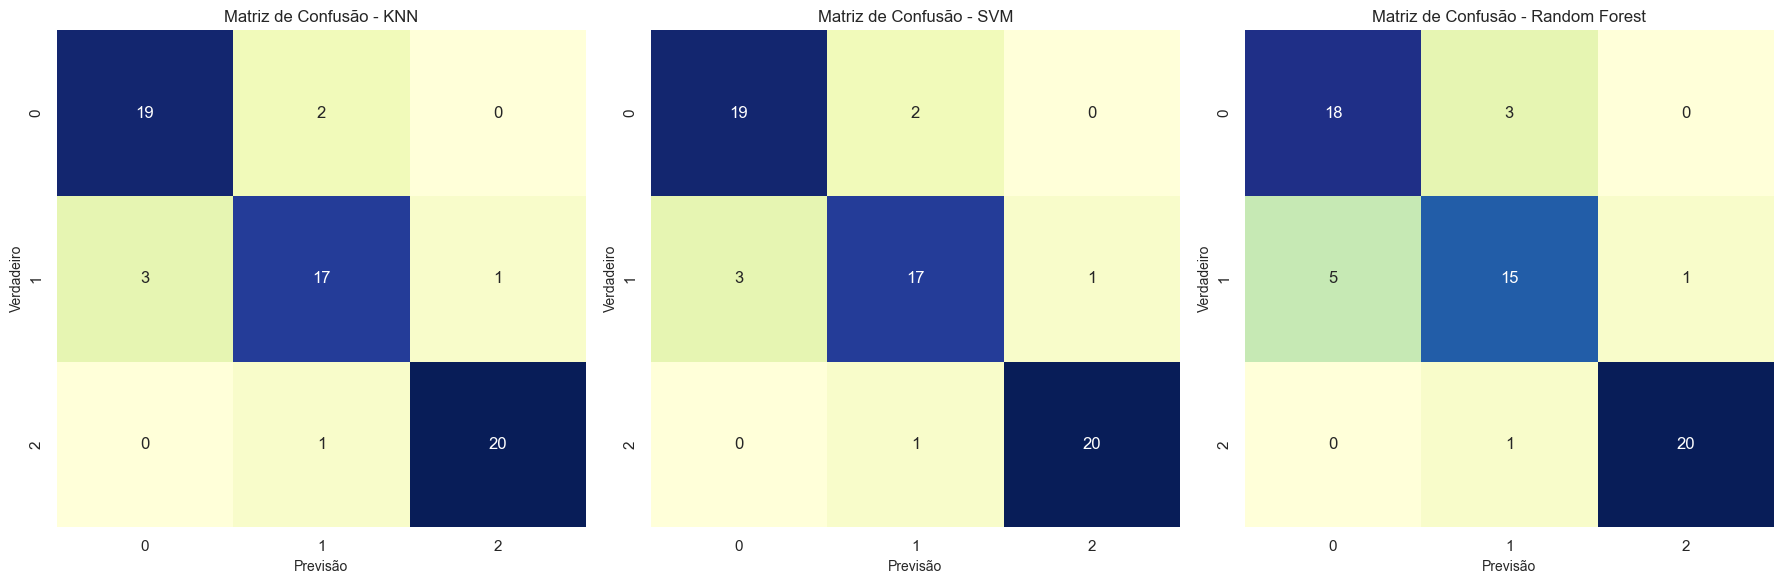

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(1, 3, figsize=(18, 6)) 


models = ["KNN", "SVM", "Random Forest"]
conf_matrices = [knn_confusion, svm_confusion, rf_confusion]


for ax, model, conf_matrix in zip(axes, models, conf_matrices):
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt="d",
        cmap="YlGnBu",
        cbar=False,
        ax=ax
    )
    ax.set_title(f"Matriz de Confusão - {model}", fontsize=12)
    ax.set_xlabel("Previsão", fontsize=10)
    ax.set_ylabel("Verdadeiro", fontsize=10)


plt.tight_layout()
plt.show()


# Otimização e Retreino dos Modelos

## **Interpretação dos Resultados**

1. **SVM (Otimizado)**:
   - O SVM foi o modelo mais consistente após a otimização, confirmando sua capacidade de separar as classes de maneira eficiente.
   - A escolha do kernel linear reforça que o problema pode ser resolvido em um espaço linear, sem necessidade de transformações complexas.
   - Foi o modelo que melhor equilibrou as métricas de desempenho entre todas as classes.

2. **KNN (Otimizado)**:
   - A otimização resultou em um modelo mais generalista devido ao aumento no número de vizinhos (`n_neighbors=10`), mas isso também levou a uma leve perda de sensibilidade a padrões locais.
   - Ainda é um modelo competitivo, mas poderia beneficiar-se de ajustes intermediários para balancear generalização e sensibilidade.

3. **Random Forest (Otimizado)**:
   - Apesar de robusto, não apresentou melhorias significativas após a otimização.
   - O modelo manteve bom desempenho para as classes com características bem separadas, mas continua apresentando dificuldades com a classe "Rosa".
   - Ajustes adicionais nos hiperparâmetros, como o número de árvores (`n_estimators`) ou a profundidade (`max_depth`), poderiam trazer melhores resultados.

4. **Classe "Rosa"**:
   - Todos os modelos apresentaram dificuldades em classificar corretamente a classe "Rosa", indicando sobreposição de características com outras classes.
   - Melhorias podem ser alcançadas com engenharia de características ou uso de modelos mais sofisticados.

---

## **Conclusão Geral**
- O **SVM** foi o modelo mais confiável e consistente, destacando-se como a melhor escolha para o problema.
- O **KNN**, embora eficiente, teve uma leve perda de desempenho após a otimização, mas ainda é uma opção viável com ajustes adicionais.
- O **Random Forest**, apesar de sua robustez, não conseguiu superar os outros dois modelos e apresentou dificuldades em classes com características sobrepostas.
- A dificuldade comum na separação da classe "Rosa" sugere que melhorias no conjunto de dados ou técnicas avançadas podem ser necessárias para alcançar uma classificação mais precisa.


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


param_grid_knn = {
    "n_neighbors": range(1, 31),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"]
}


grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring="accuracy",
    cv=5,
    n_jobs=-1
)
grid_search_knn.fit(X_train_scaled, y_train)


random_search_knn = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=param_grid_knn,
    scoring="accuracy",
    n_iter=50,
    cv=5,
    n_jobs=-1,
    random_state=42
)
random_search_knn.fit(X_train_scaled, y_train)


print("Melhores parâmetros - Grid Search (KNN):", grid_search_knn.best_params_)
print("Melhores parâmetros - Randomized Search (KNN):", random_search_knn.best_params_)


Melhores parâmetros - Grid Search (KNN): {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Melhores parâmetros - Randomized Search (KNN): {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan'}


c:\Users\gugue\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:

param_grid_svm = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": ["scale", "auto"]
}


grid_search_svm = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid_svm,
    scoring="accuracy",
    cv=5,
    n_jobs=-1
)
grid_search_svm.fit(X_train_scaled, y_train)


random_search_svm = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=param_grid_svm,
    scoring="accuracy",
    n_iter=20,
    cv=5,
    n_jobs=-1,
    random_state=42
)
random_search_svm.fit(X_train_scaled, y_train)


print("Melhores parâmetros - Grid Search (SVM):", grid_search_svm.best_params_)
print("Melhores parâmetros - Randomized Search (SVM):", random_search_svm.best_params_)


Melhores parâmetros - Grid Search (SVM): {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Melhores parâmetros - Randomized Search (SVM): {'kernel': 'linear', 'gamma': 'scale', 'C': 1}


In [ ]:

param_grid_rf = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}


grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid_rf,
    scoring="accuracy",
    cv=5,
    n_jobs=-1
)
grid_search_rf.fit(X_train, y_train)


random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_grid_rf,
    scoring="accuracy",
    n_iter=50,
    cv=5,
    n_jobs=-1,
    random_state=42
)
random_search_rf.fit(X_train, y_train)

print("Melhores parâmetros - Grid Search (Random Forest):", grid_search_rf.best_params_)
print("Melhores parâmetros - Randomized Search (Random Forest):", random_search_rf.best_params_)


c:\Users\gugue\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Melhores parâmetros - Grid Search (Random Forest): {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Melhores parâmetros - Randomized Search (Random Forest): {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}


In [ ]:

best_knn = KNeighborsClassifier(
    n_neighbors=10,  
    weights="distance", 
    metric="manhattan"
)
best_knn.fit(X_train_scaled, y_train)


y_pred_best_knn = best_knn.predict(X_test_scaled)


best_knn_accuracy = accuracy_score(y_test, y_pred_best_knn)
best_knn_precision = precision_score(y_test, y_pred_best_knn, average="weighted")
best_knn_recall = recall_score(y_test, y_pred_best_knn, average="weighted")
best_knn_f1 = f1_score(y_test, y_pred_best_knn, average="weighted")
best_knn_confusion = confusion_matrix(y_test, y_pred_best_knn)


print("Desempenho do KNN (melhores parâmetros - Grid Search):")
print(f"Acurácia: {best_knn_accuracy:.4f}")
print(f"Precisão: {best_knn_precision:.4f}")
print(f"Recall: {best_knn_recall:.4f}")
print(f"F1-Score: {best_knn_f1:.4f}")
print("Matriz de Confusão:")
print(best_knn_confusion)


Desempenho do KNN (melhores parâmetros - Grid Search):
Acurácia: 0.8730
Precisão: 0.8735
Recall: 0.8730
F1-Score: 0.8720
Matriz de Confusão:
[[19  2  0]
 [ 4 16  1]
 [ 0  1 20]]


In [ ]:

best_svm = SVC(
    C=1, 
    kernel="linear", 
    gamma="scale",
    random_state=42
)
best_svm.fit(X_train_scaled, y_train)


y_pred_best_svm = best_svm.predict(X_test_scaled)


best_svm_accuracy = accuracy_score(y_test, y_pred_best_svm)
best_svm_precision = precision_score(y_test, y_pred_best_svm, average="weighted")
best_svm_recall = recall_score(y_test, y_pred_best_svm, average="weighted")
best_svm_f1 = f1_score(y_test, y_pred_best_svm, average="weighted")
best_svm_confusion = confusion_matrix(y_test, y_pred_best_svm)


print("Desempenho do SVM (melhores parâmetros - Grid Search):")
print(f"Acurácia: {best_svm_accuracy:.4f}")
print(f"Precisão: {best_svm_precision:.4f}")
print(f"Recall: {best_svm_recall:.4f}")
print(f"F1-Score: {best_svm_f1:.4f}")
print("Matriz de Confusão:")
print(best_svm_confusion)


Desempenho do SVM (melhores parâmetros - Grid Search):
Acurácia: 0.8889
Precisão: 0.8887
Recall: 0.8889
F1-Score: 0.8885
Matriz de Confusão:
[[19  2  0]
 [ 3 17  1]
 [ 0  1 20]]


In [ ]:

best_rf = RandomForestClassifier(
    n_estimators=10, 
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=False,
    random_state=42
)
best_rf.fit(X_train, y_train)  


y_pred_best_rf = best_rf.predict(X_test)


best_rf_accuracy = accuracy_score(y_test, y_pred_best_rf)
best_rf_precision = precision_score(y_test, y_pred_best_rf, average="weighted")
best_rf_recall = recall_score(y_test, y_pred_best_rf, average="weighted")
best_rf_f1 = f1_score(y_test, y_pred_best_rf, average="weighted")
best_rf_confusion = confusion_matrix(y_test, y_pred_best_rf)


print("Desempenho do Random Forest (melhores parâmetros - Grid Search):")
print(f"Acurácia: {best_rf_accuracy:.4f}")
print(f"Precisão: {best_rf_precision:.4f}")
print(f"Recall: {best_rf_recall:.4f}")
print(f"F1-Score: {best_rf_f1:.4f}")
print("Matriz de Confusão:")
print(best_rf_confusion)


Desempenho do Random Forest (melhores parâmetros - Grid Search):
Acurácia: 0.8413
Precisão: 0.8415
Recall: 0.8413
F1-Score: 0.8402
Matriz de Confusão:
[[18  3  0]
 [ 5 15  1]
 [ 0  1 20]]


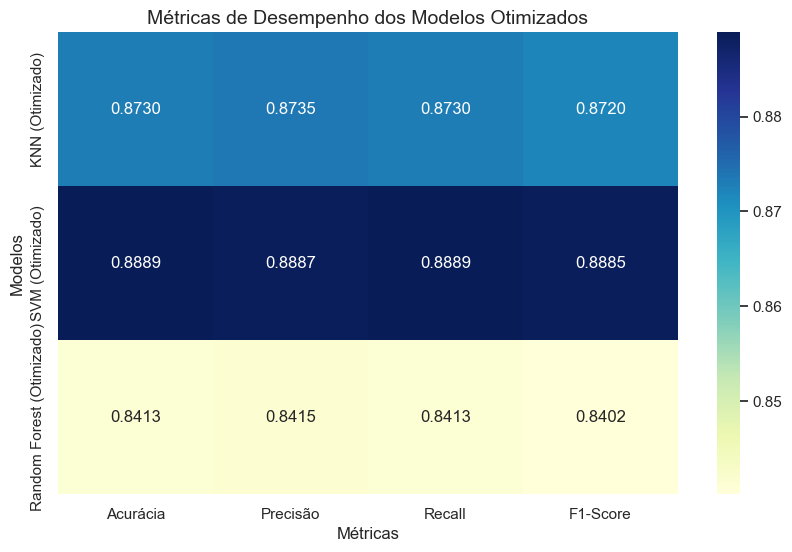

In [ ]:

optimized_results = pd.DataFrame({
    "Modelo": ["KNN (Otimizado)", "SVM (Otimizado)", "Random Forest (Otimizado)"],
    "Acurácia": [best_knn_accuracy, best_svm_accuracy, best_rf_accuracy],
    "Precisão": [best_knn_precision, best_svm_precision, best_rf_precision],
    "Recall": [best_knn_recall, best_svm_recall, best_rf_recall],
    "F1-Score": [best_knn_f1, best_svm_f1, best_rf_f1]
}).set_index("Modelo")


plt.figure(figsize=(10, 6))
sns.heatmap(
    optimized_results,
    annot=True,  
    fmt=".4f",   
    cmap="YlGnBu",  
    cbar=True  
)


plt.title("Métricas de Desempenho dos Modelos Otimizados", fontsize=14)
plt.xlabel("Métricas", fontsize=12)
plt.ylabel("Modelos", fontsize=12)
plt.show()


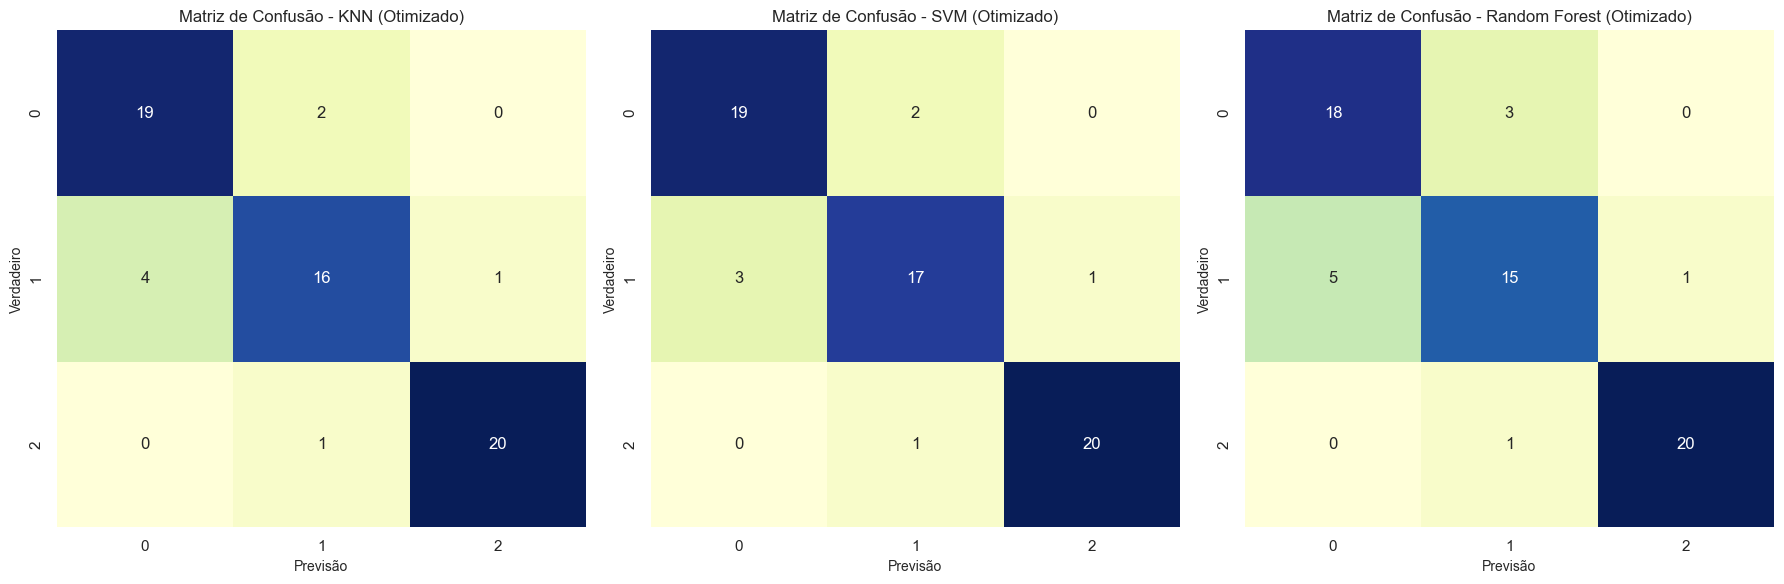

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  


models_optimized = ["KNN (Otimizado)", "SVM (Otimizado)", "Random Forest (Otimizado)"]
conf_matrices_optimized = [best_knn_confusion, best_svm_confusion, best_rf_confusion]


for ax, model, conf_matrix in zip(axes, models_optimized, conf_matrices_optimized):
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt="d",
        cmap="YlGnBu",
        cbar=False,
        ax=ax
    )
    ax.set_title(f"Matriz de Confusão - {model}", fontsize=12)
    ax.set_xlabel("Previsão", fontsize=10)
    ax.set_ylabel("Verdadeiro", fontsize=10)


plt.tight_layout()
plt.show()